<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/40_ShorAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 1: classical computer

In [3]:
N = 15
m = 7
from math import gcd
if gcd(m,N) != 1:
    print('problem solved')
else:
    print('proceed to step 2')

proceed to step 2


## Step 2: use a quantum computer to determine the period of f(x) = m^x mod N

### Step 2.1

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

### Step 2.2 and 2.3

In [5]:
f = []
for i in range(2**4):
    f.append((m**i%N))

In [6]:
f

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13]

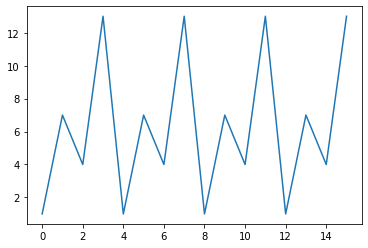

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,16,1)
plt.plot(x,(m**x)%N)

In [8]:
for i in range(2**4):
    print('|' + str(f[i]) + '>' + '|' + str(i) + '>')

|1>|0>
|7>|1>
|4>|2>
|13>|3>
|1>|4>
|7>|5>
|4>|6>
|13>|7>
|1>|8>
|7>|9>
|4>|10>
|13>|11>
|1>|12>
|7>|13>
|4>|14>
|13>|15>


### step 2.4

In [9]:
from random import choice
#measurement = choice(f)
measurement = 4

In [10]:
measurement

4

In [11]:
amplitudes = []
for i in range(2**4):
    amplitudes.append(0)
for i in range(2**4):
    if f[i] == measurement:
        print(str(i) + ' = |' + bin(i)[2:].zfill(4) + '>')
        amplitudes[i]=0.5

2 = |0010>
6 = |0110>
10 = |1010>
14 = |1110>


In [12]:
amplitudes

[0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5, 0]

In [13]:
qc.initialize(amplitudes,[q[0],q[1],q[2],q[3]])

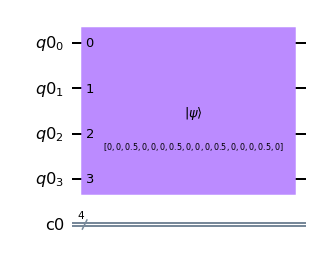

In [14]:
qc.draw('mpl')

### Step 2.5

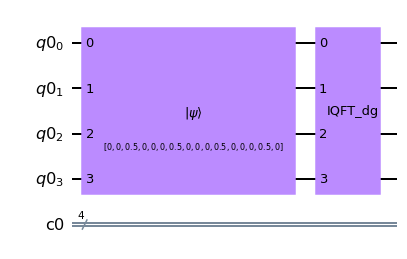

In [15]:
from qiskit.circuit.library import QFT
in_qft = QFT(4,inverse=True)
qc = qc.compose(in_qft)
qc.draw('mpl')

### Step 2.6

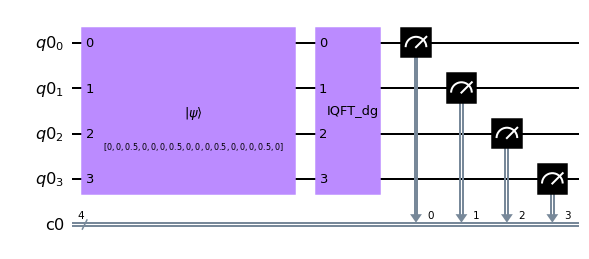

In [16]:
for i in range(4):
    qc.measure(q[i],c[i])
qc.draw('mpl')

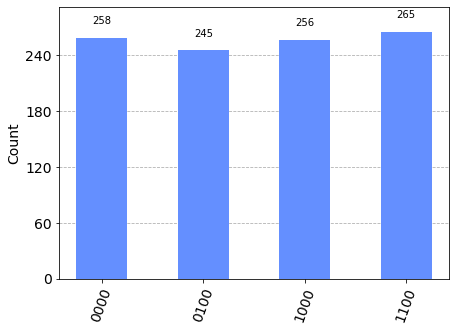

In [17]:
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [18]:
def result(counts):
    results = []
    for key in counts.keys():
        results.append(int(key,2))
    return results

In [19]:
result(counts)

[0, 4, 8, 12]

### Step 3: classical computer

In [20]:
a = 2**4/result(counts)[1]

In [21]:
a

4.0

### Step 4: classical computer

In [22]:
if a%2 != 0:
    print('goto step 1')
else:
    x = (m**(a/2))%N

In [23]:
x

4.0

### Step 5: classical computer

In [24]:
p = x+1
q =x-1
print(p,q)

5.0 3.0
